# Random Forest

In [ ]:
import pandas as pd
glass = pd.read_excel('/content/glass.xlsx',sheet_name = 'glass')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
def remove_outliers(df):
  numerical_columns = df.select_dtypes(include = 'float64')
  for i in numerical_columns:
    Q1  = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + (IQR * 1.5)
    LL = Q1 - (IQR * 1.5)
    df = df[(df[i] >= LL) & (df[i] <= UL)]
  return df

out_data = remove_outliers(glass)
out_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00,3
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00,3
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00,3
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3


In [ ]:
import pandas as pd

def remove_outliers(df, columns):

    numerical_columns = [col for col in columns if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        UL = Q3 + (IQR * 1.5)
        LL = Q1 - (IQR * 1.5)

        # Filter rows based on outlier criteria
        df = df[(df[column] >= LL) & (df[column] <= UL)]

    return df

selected_columns = ['RI',	'Na',	'Mg',	'Al'	,'Si',	'K',	'Ca',	'Ba'	]
out_data = remove_outliers(glass, columns=selected_columns)


In [ ]:
out_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
...,...,...,...,...,...,...,...,...,...,...
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00,3
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00,3
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00,3
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3


In [ ]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


**2: Data Visualization:**

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1500x1500 with 0 Axes>

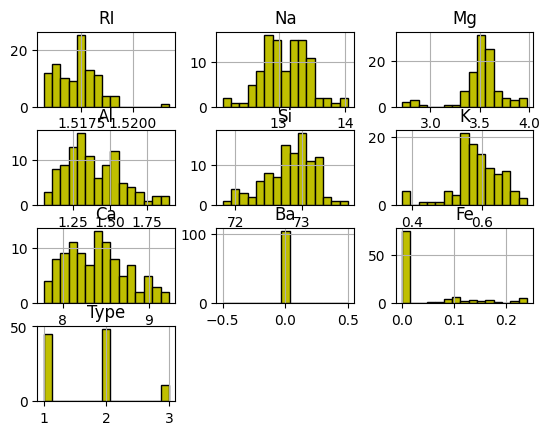

In [ ]:
plt.figure(figsize = (15,15))
out_data.hist(bins = 15,color = 'y' , edgecolor = 'k')

<Axes: >

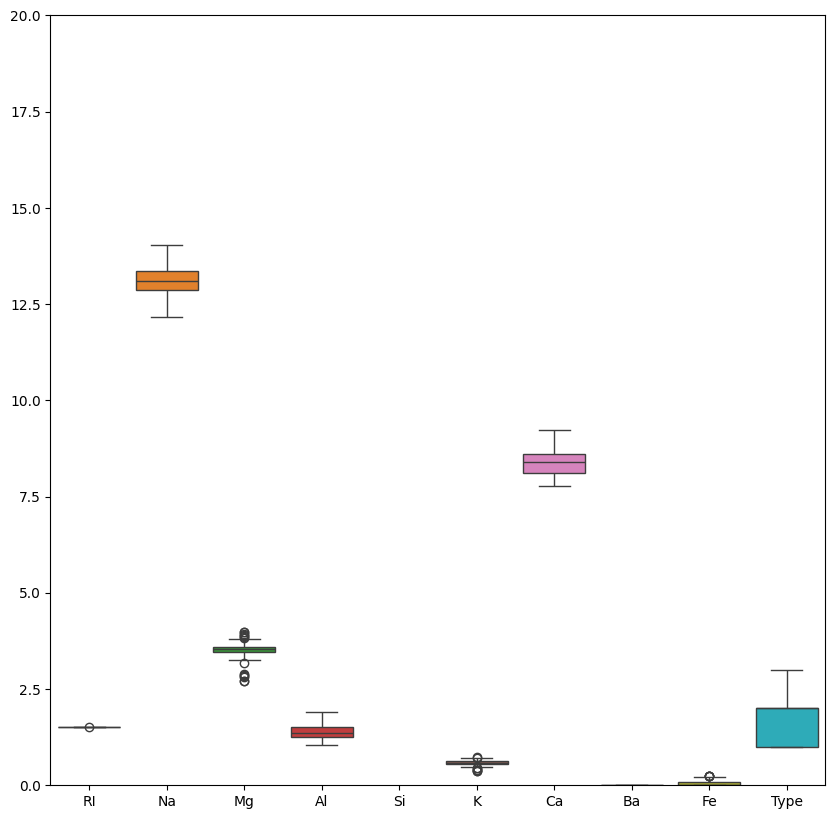

In [ ]:
plt.figure(figsize=(10,10))
plt.ylim(0,20)
sns.boxplot(out_data)

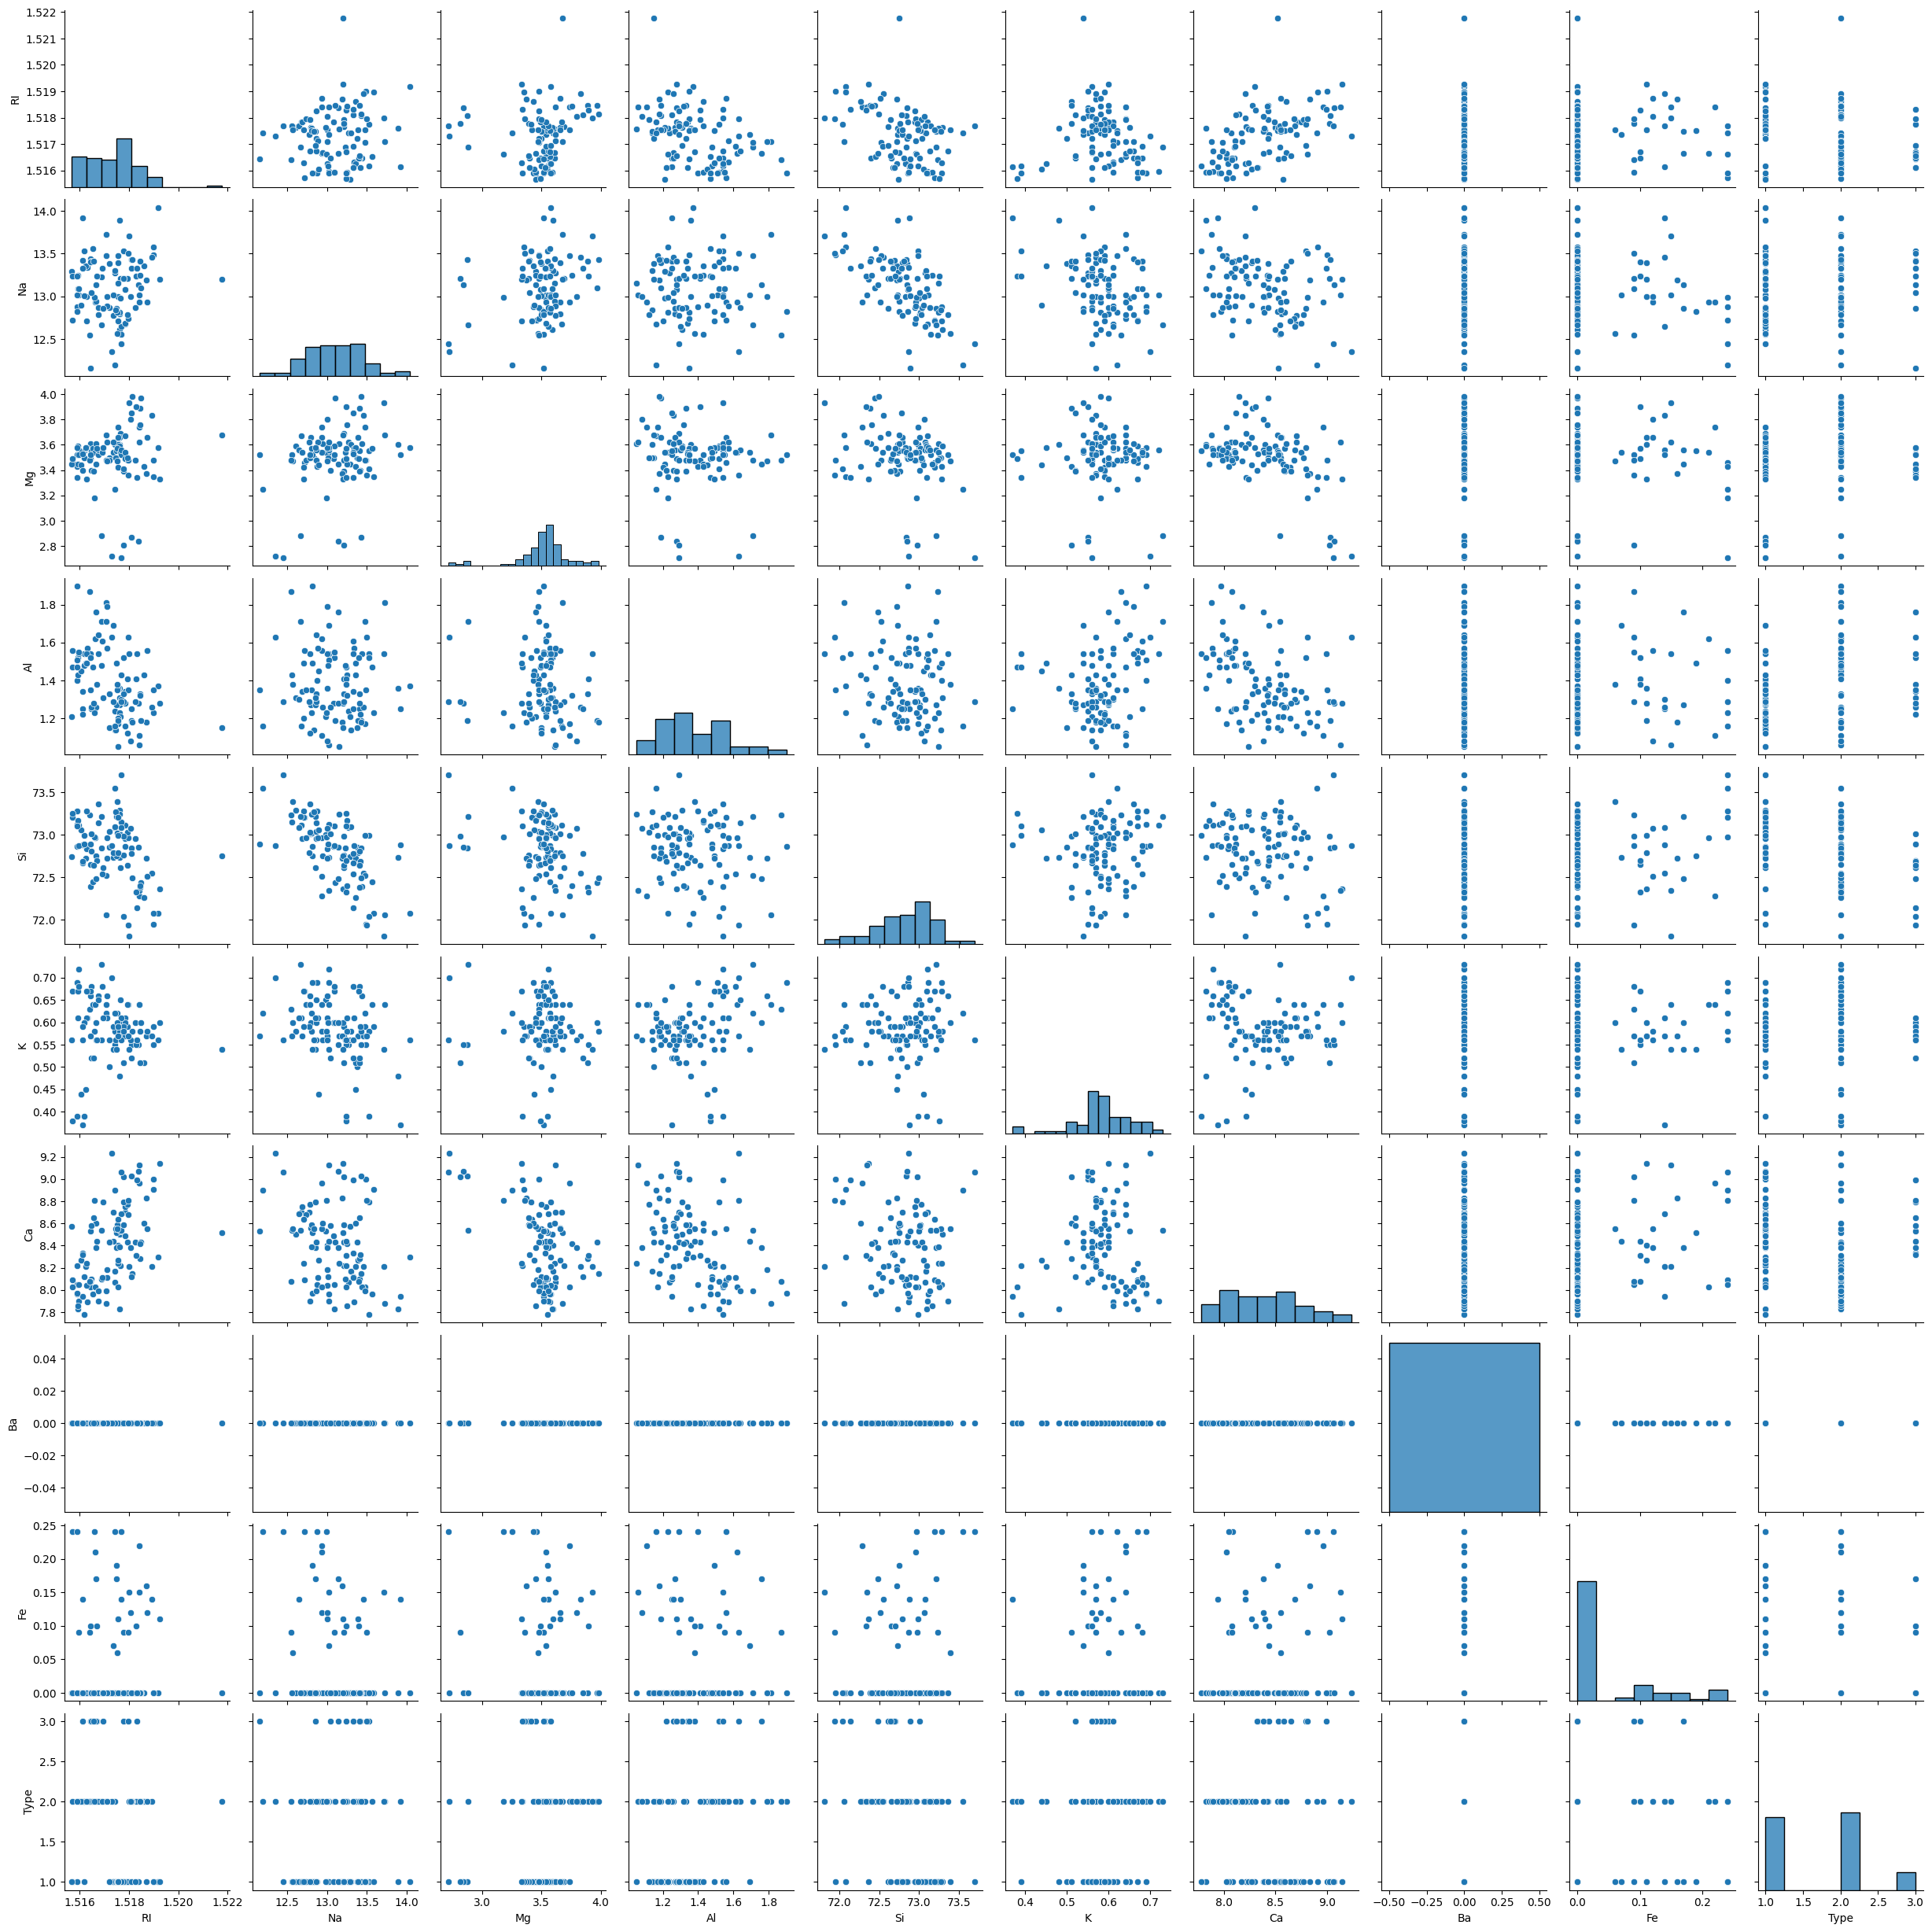

In [ ]:
sns.pairplot(out_data)

In [ ]:
out_data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,0.112558,0.119473,-0.411694,-0.389915,-0.101900,0.527862,NaN,0.030877,-0.283903
Na,0.112558,1.000000,0.252616,-0.014180,-0.642772,-0.359758,-0.307472,NaN,-0.183155,0.131456
Mg,0.119473,0.252616,1.000000,-0.112102,-0.282293,-0.060664,-0.483946,NaN,-0.093993,0.080182
Al,-0.411694,-0.014180,-0.112102,1.000000,-0.124871,0.264455,-0.409398,NaN,-0.039480,0.341190
Si,-0.389915,-0.642772,-0.282293,-0.124871,1.000000,0.072888,-0.154089,NaN,0.071728,-0.320673
K,-0.101900,-0.359758,-0.060664,0.264455,0.072888,1.000000,-0.036310,NaN,0.052779,0.049001
Ca,0.527862,-0.307472,-0.483946,-0.409398,-0.154089,-0.036310,1.000000,NaN,0.180093,-0.134659
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,0.030877,-0.183155,-0.093993,-0.039480,0.071728,0.052779,0.180093,NaN,1.000000,-0.026387
Type,-0.283903,0.131456,0.080182,0.341190,-0.320673,0.049001,-0.134659,NaN,-0.026387,1.000000


<Axes: >

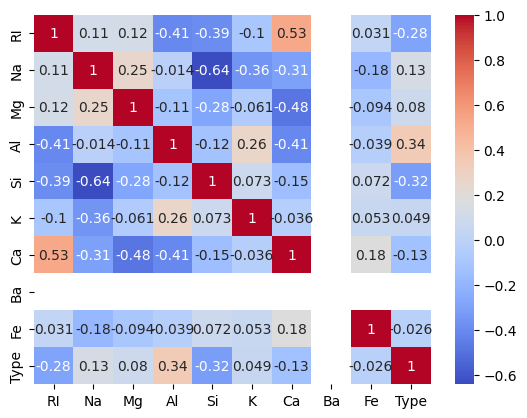

In [ ]:
corr_matrix = out_data.corr()
sns.heatmap(corr_matrix,annot = True ,cmap = 'coolwarm')


In [ ]:
out_data['Ba'].unique()

array([0.])

Refractive index(RI) and calcium (Ca) has high correlation compare to others

<Axes: xlabel='RI', ylabel='Ca'>

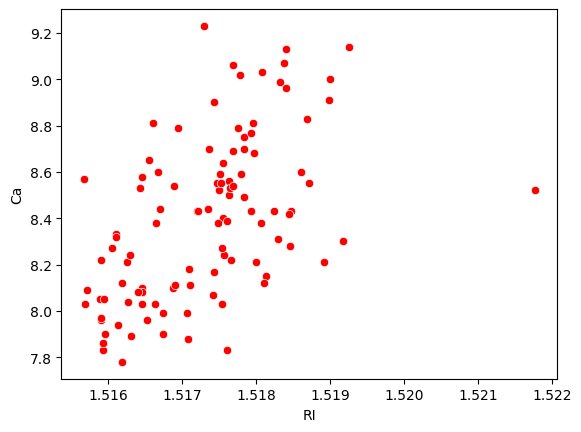

In [ ]:
sns.scatterplot(out_data, x = 'RI' , y = 'Ca' , color = 'red' )

**3: Data Preprocessing**

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.



removal of outliers as done and
there is no categorical data in the dataset


In [ ]:
out_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.0,1


In [ ]:
x = out_data.iloc[:,:-1]
y = out_data.iloc[:,-1]

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(x)
#scaled_data

array([[ 2.92265983e-01,  2.26504428e+00,  4.09688548e-01,
        -1.23542200e-01, -2.34910763e-01, -1.54899255e+00,
        -1.62352390e+00,  0.00000000e+00, -5.79855610e-01],
       [-1.13471356e+00,  1.23450280e+00,  1.86612061e-01,
         8.48184683e-01,  4.75602328e-01, -2.87791742e+00,
        -1.76644457e+00,  0.00000000e+00, -5.79855610e-01],
       [ 3.42160373e-01,  3.18465941e-01,  8.11226225e-01,
        -5.01435988e-01, -5.62839882e-01, -2.20067686e-01,
        -5.08742634e-01,  0.00000000e+00, -5.79855610e-01],
       [ 1.02667302e-01,  4.90222853e-01,  4.98919143e-01,
        -7.71360122e-01,  7.21549168e-01, -5.15384323e-01,
        -9.37504659e-01,  0.00000000e+00, -5.79855610e-01],
       [ 1.12646180e-01,  5.76101309e-01,  4.09688548e-01,
        -1.31120839e+00,  7.48876594e-01, -7.24093676e-02,
        -6.51663309e-01,  0.00000000e+00, -5.79855610e-01],
       [ 2.42371593e-01,  1.46709029e-01,  4.54303846e-01,
        -1.79707183e+00,  1.15878799e+00, -2.200676

**4: Random Forest Model Implementation**

1. Divide the data into train and test split.

2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2])

<Axes: >

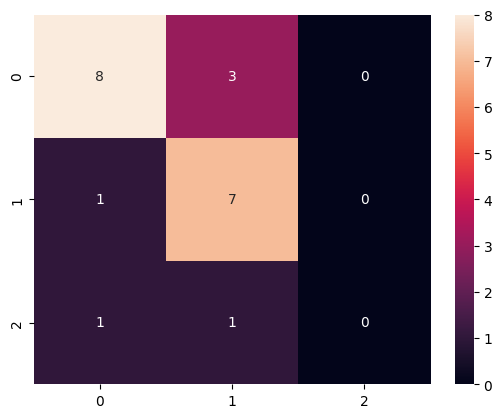

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score , f1_score

acc_score = accuracy_score(y_test,y_pred)
print('accuracy_score : ',acc_score)

prec_score = precision_score(y_test,y_pred , average = 'micro')
print('precision_score : ' , prec_score)

reca_score = recall_score(y_test,y_pred , average = 'micro')
print('recall_score', reca_score)

f_one_score = f1_score(y_test,y_pred , average = 'micro')
print('f1_score : ', f_one_score)

accuracy_score :  0.7142857142857143
precision_score :  0.7142857142857143
recall_score 0.7142857142857143
f1_score :  0.7142857142857143


the probability percentage is 71%

**5: Bagging and Boosting Methods**

Apply the Bagging and Boosting methods and compare the results.



#bagging method

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(x_train, y_train)

y_pred = bagging_clf.predict(x_test)

print(f'Bagging Accuracy: {accuracy_score(y_test, y_pred)}')

Bagging Accuracy: 0.7142857142857143


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


#boosting method

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

boosting_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
boosting_clf.fit(x_train, y_train)

y_pred = bagging_clf.predict(x_test)

print(f'Bagging Accuracy: {accuracy_score(y_test, y_pred)}')

Bagging Accuracy: 0.7142857142857143


#the accuracy is 0.7142... it means the model trains with 71%

# Interview questions

# 1.Explain Bagging and Boosting methods. How is it different from each other.

# 2.Explain how to handle imbalance in the data.